In [1]:
from transformers import DPTImageProcessor, DPTForDepthEstimation, DPTFeatureExtractor, AutoImageProcessor
import torch
import numpy as np
from PIL import Image
import requests
import time
from transformers import pipeline
import matplotlib.pyplot as plt
import cv2

c:\Users\damem\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
processor = DPTImageProcessor.from_pretrained("Intel/dpt-swinv2-tiny-256")
model = DPTForDepthEstimation.from_pretrained("Intel/dpt-swinv2-tiny-256")

In [3]:
def get_depth_map(image):
    inputs = processor(images=image, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**inputs)
        predicted_depth = outputs.predicted_depth

    # interpolate to original size
    prediction = torch.nn.functional.interpolate(
        predicted_depth.unsqueeze(1),
        size=image.size[::-1],
        mode="bicubic",
        align_corners=False,
    )

    # visualize the prediction
    output = prediction.squeeze().cpu().numpy()
    depth_map = (output * 255 / np.max(output)).astype("uint8")
    
    return depth_map

In [33]:
start_time = time.time()
image = Image.open('image3.jpg')
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f'The task took {elapsed_time:.4f} seconds to finish.')

image = get_depth_map(image)

The task took 0.0010 seconds to finish.


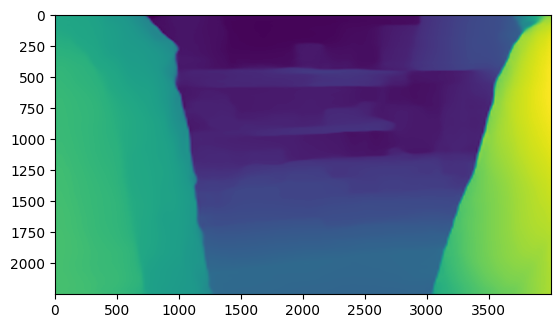

In [5]:
plt.imshow(Image.fromarray(image))

In [30]:
cap = cv2.VideoCapture(0)
pipe = pipeline(task="depth-estimation", model="Intel/dpt-swinv2-tiny-256")
while cap.isOpened():
    start_time = time.time()
    
    ret, frame = cap.read()
    frame_pil = Image.fromarray(frame)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f'image preprocessing took {elapsed_time:.4f} seconds to finish.')
    
    start_time = time.time()
    result = pipe(frame_pil)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f'prediction took {elapsed_time:.4f} seconds to finish.')

    #cv2.imshow("CV2Frame", frame)
    plt.pause(0.00001)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()

image preprocessing took 0.5986 seconds to finish.
prediction took 0.8617 seconds to finish.
image preprocessing took 0.0032 seconds to finish.
prediction took 0.8350 seconds to finish.
image preprocessing took 0.0050 seconds to finish.
prediction took 0.8351 seconds to finish.
image preprocessing took 0.0032 seconds to finish.
prediction took 0.9185 seconds to finish.
image preprocessing took 0.0013 seconds to finish.
prediction took 0.9251 seconds to finish.
image preprocessing took 0.0040 seconds to finish.
prediction took 0.8369 seconds to finish.
image preprocessing took 0.0019 seconds to finish.
prediction took 0.8769 seconds to finish.
image preprocessing took 0.0048 seconds to finish.
prediction took 0.8804 seconds to finish.
image preprocessing took 0.0040 seconds to finish.
prediction took 0.8063 seconds to finish.
image preprocessing took 0.0015 seconds to finish.
prediction took 0.8389 seconds to finish.
image preprocessing took 0.0029 seconds to finish.
prediction took 0.8

KeyboardInterrupt: 

In [34]:
cap.release()
cv2.destroyAllWindows()